### 2. Problem Statement 

A financial institution wants to predict whether a customer will default on a loan before approving it. Early identification of risky customers helps reduce financial loss. 

You are working as a Machine Learning Analyst and must build a classification model using the K-Nearest Neighbors (KNN) algorithm to predict loan default. 

This case introduces: 

1. Mixed feature types
2. Financial risk interpretation
3. Class imbalance awareness 

Age,AnnualIncome(lakhs),CreditScore(300-900), LoanAmount(lakhs), LoanTerm(years), EmploymentType, loan(yes/no) 

28,6.5,720,5,5,Salaried,0 
45,12,680,10,10,Self-Employed,1 
35,8,750,6,7,Salaried,0 
50,15,640,12,15,Self-Employed,1 
30,7,710,5,5,Salaried,0 
42,10,660,9,10,Salaried,1 
26,5.5,730,4,4,Salaried,0 
48,14,650,11,12,Self-Employed,1 
38,9,700,7,8,Salaried,0 
55,16,620,13,15,Self-Employed,1 

Interpretation 

1. Identify high-risk customers.
2. What patterns lead to loan default?
3. How do credit score and income influence predictions?
4. Suggest banking policies based on model output.
5. Compare KNN with Decision Trees for this problem.
6. What happens if LoanAmount dominates distance calculation?
7. Should KNN be used in real-time loan approval systems? 

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [144]:
# upload the data

loan_dic= {
    'age':[28,45,35,50,30,42,26,48,38,55],
    'annual_income':[6.5,12,8,15,7,10,5.5,14,9,16],
    'credit_score':[720,680,750,640,710,660,730,650,700,620],
    'loan_amt':[5,10,6,12,5,9,4,11,7,13],
    'loan_team':[5,10,7,15,5,10,4,12,8,15],
    'Emp_type':['Salaried','Self-Employed','Salaried','Self-Employed','Salaried',
                'Salaried','Salaried','Self-Employed','Salaried','Self-Employed'],
    'loan':[0,1,0,1,0,1,0,1,0,1]
}

# loan data frame

loan_df = pd.DataFrame(loan_dic)

In [189]:
# Sample data

loan_df

,age,annual_income,credit_score,loan_amt,loan_team,Emp_type,loan
0,28,6.5,720,5,5,0,0
1,45,12.0,680,10,10,1,1
2,35,8.0,750,6,7,0,0
3,50,15.0,640,12,15,1,1
4,30,7.0,710,5,5,0,0
5,42,10.0,660,9,10,0,1
6,26,5.5,730,4,4,0,0
7,48,14.0,650,11,12,1,1
8,38,9.0,700,7,8,0,0
9,55,16.0,620,13,15,1,1


In [195]:
# Preprocessing
# Encode 'Emp_type' (Salaried=0, Self-Employed=1)
le = LabelEncoder()
loan_df['Emp_type'] = le.fit_transform(loan_df['Emp_type'])

# Extracting features
X = loan_df.drop('loan', axis = 1)
y = loan_df['loan']

In [197]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [199]:
# Using k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=2)

In [205]:
# Predict and Evaluate
y_pred = knn.predict(X_scaled)
print(f"Accuracy: {accuracy_score(y, y_pred) * 100}%")

Accuracy: 90.0%


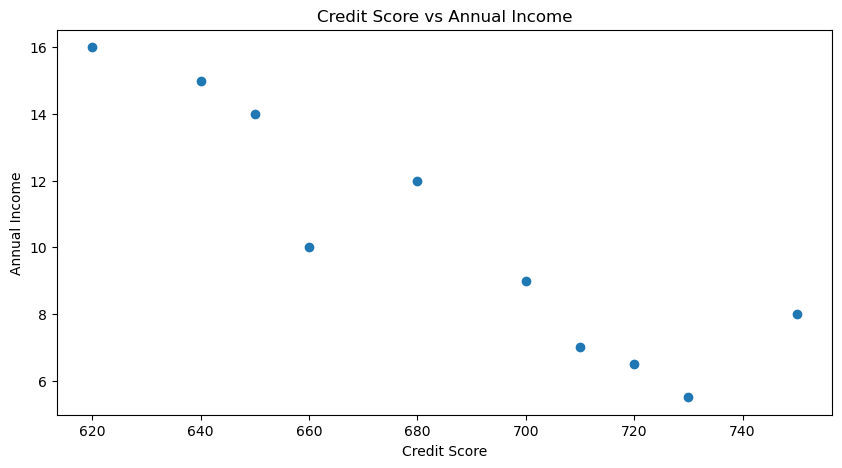

In [175]:
# Scatter plot Credit score vs Annual income

fig = plt.figure(figsize = (10,5))
plt.scatter(loan_df['credit_score'],loan_df['annual_income'])
plt.title('Credit Score vs Annual Income')
plt.ylabel('Annual Income')
plt.xlabel('Credit Score')
plt.show()

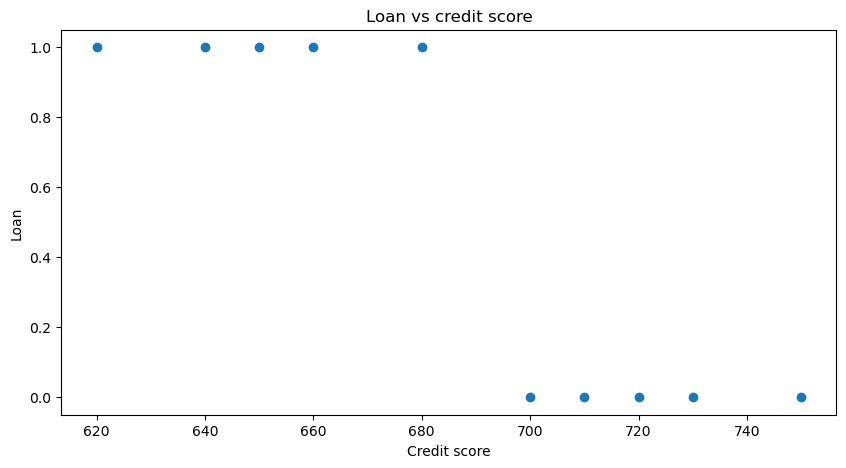

In [178]:
# Scatter plot of credit score vs laon

fig = plt.figure(figsize = (10,5))
plt.scatter(loan_df['credit_score'],loan_df['loan'])
plt.title('Loan vs credit score')
plt.ylabel('Loan')
plt.xlabel('Credit score')
plt.show()

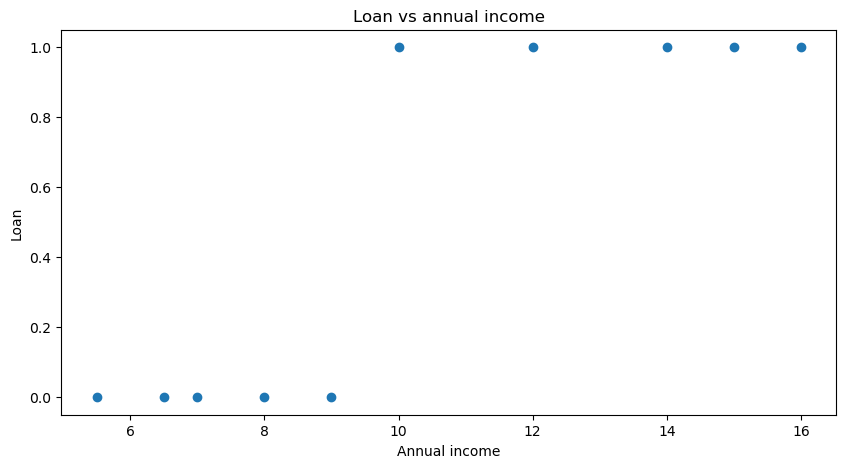

In [179]:
# Scatter plot of Income vs laon

fig = plt.figure(figsize = (10,5))
plt.scatter(loan_df['annual_income'],loan_df['loan'])
plt.title('Loan vs annual income')
plt.ylabel('Loan')
plt.xlabel('Annual income')
plt.show()

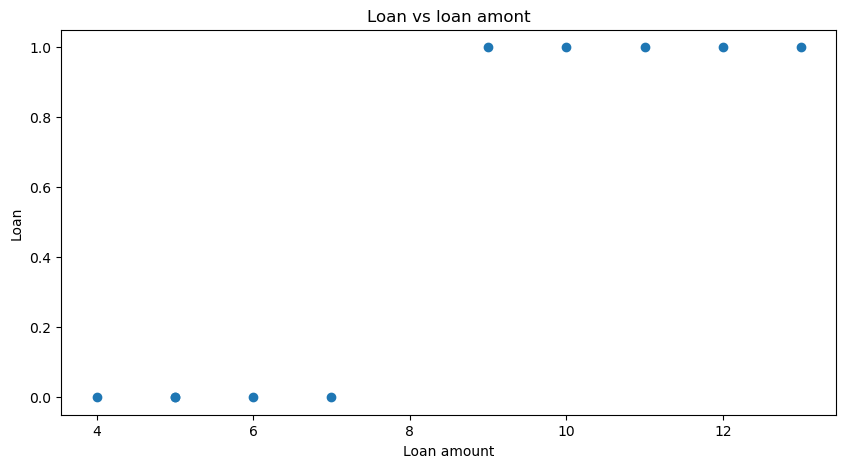

In [177]:
# credit score Box plot and income box plot

fig = plt.figure(figsize = (10,5))
plt.scatter(loan_df['loan_amt'],loan_df['loan'])
plt.title('Loan vs loan amont')
plt.ylabel('Loan')
plt.xlabel('Loan amount')
plt.show()

In [211]:
# Fitting Decision Tree model

dt_model = DecisionTreeClassifier(random_state = 2)
dt_mod = dt_model.fit(X_scaled, y)

In [212]:
# predict the values

y_pred_dt = dt_mod.predict(X_scaled)
print(f"Accuracy: {accuracy_score(y, y_pred_dt) * 100}%")

Accuracy: 100.0%


# Interpretation

1. Identify high-risk customers.
 
A. The customer whose age is above 40, self-employee and loan amount is >= 10 Lac.

2. What patterns lead to loan default?

A. The person who is mid age, self employee and borrowed loan >= 80% of annual income 

3. How do credit score and income influence predictions?

A. Lower the credit score results higher the odds to be defaulter. Ideally higher the income should results lower the odds to be defaulter, but due to inverse relationship among credit score and income, higher the income results in higher the odds to be defaulter.

5. Suggest banking policies based on model output

A. 1. Scrutinize Self-employee: Since, most of the self-employee are defaulting, they should be flagged and furter scrutinized based on 2 or 3 yrs of ITR.
   2. Credit score benchmar: Flags those customer whose credit socre is below 700 for furhter investigation.
   3. Cap on income to loan: Since the income to loan ratio above the 80% are mostly defaulting, the loan eligibility should be cap to 75% of income.

6. Compare KNN with Decision Trees for this problem.

A. KNN model misclassified one record whereas decision classified all the records correctly.

7. What happens if LoanAmount dominates distance calculation?

A. If Loanamount dominates distance calculation then their will be high probability of misclassification, as the defaulter and non-defualter's space is very closer and may overlap if the sample size increased.

8. Should KNN be used in real-time loan approval systems?

A. Scalability will be the challenge in real time, as the data explode the KNN model will use high resources.